Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

<b>Data Set Information:</b>

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

<b>Attribute Information:</b>

Input variables (based on physicochemical tests):
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
12 - quality (score between 0 and 10)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import os

In [3]:
# Load the dataset 
wine_red= pd.read_csv("winequality-red.csv")

In [4]:
wine_red.shape

(1599, 12)

<b>Observation:</b>
<li> There are 1599 rows and 12 columns in the dataset.</li>

In [5]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
wine_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<b>Observation:</b>
<li> Out of the 12 variables, 11 variables are of float data types and 1 variable is of int data type. </li>

# Checking for Missing values

In [16]:
wine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
wine_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<b>Observation:</b>
<li> There are no missing values in the dataset.</li>

In [117]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<b>Observation:</b>
<li>In some of the variables, mean is greater than median.</li>

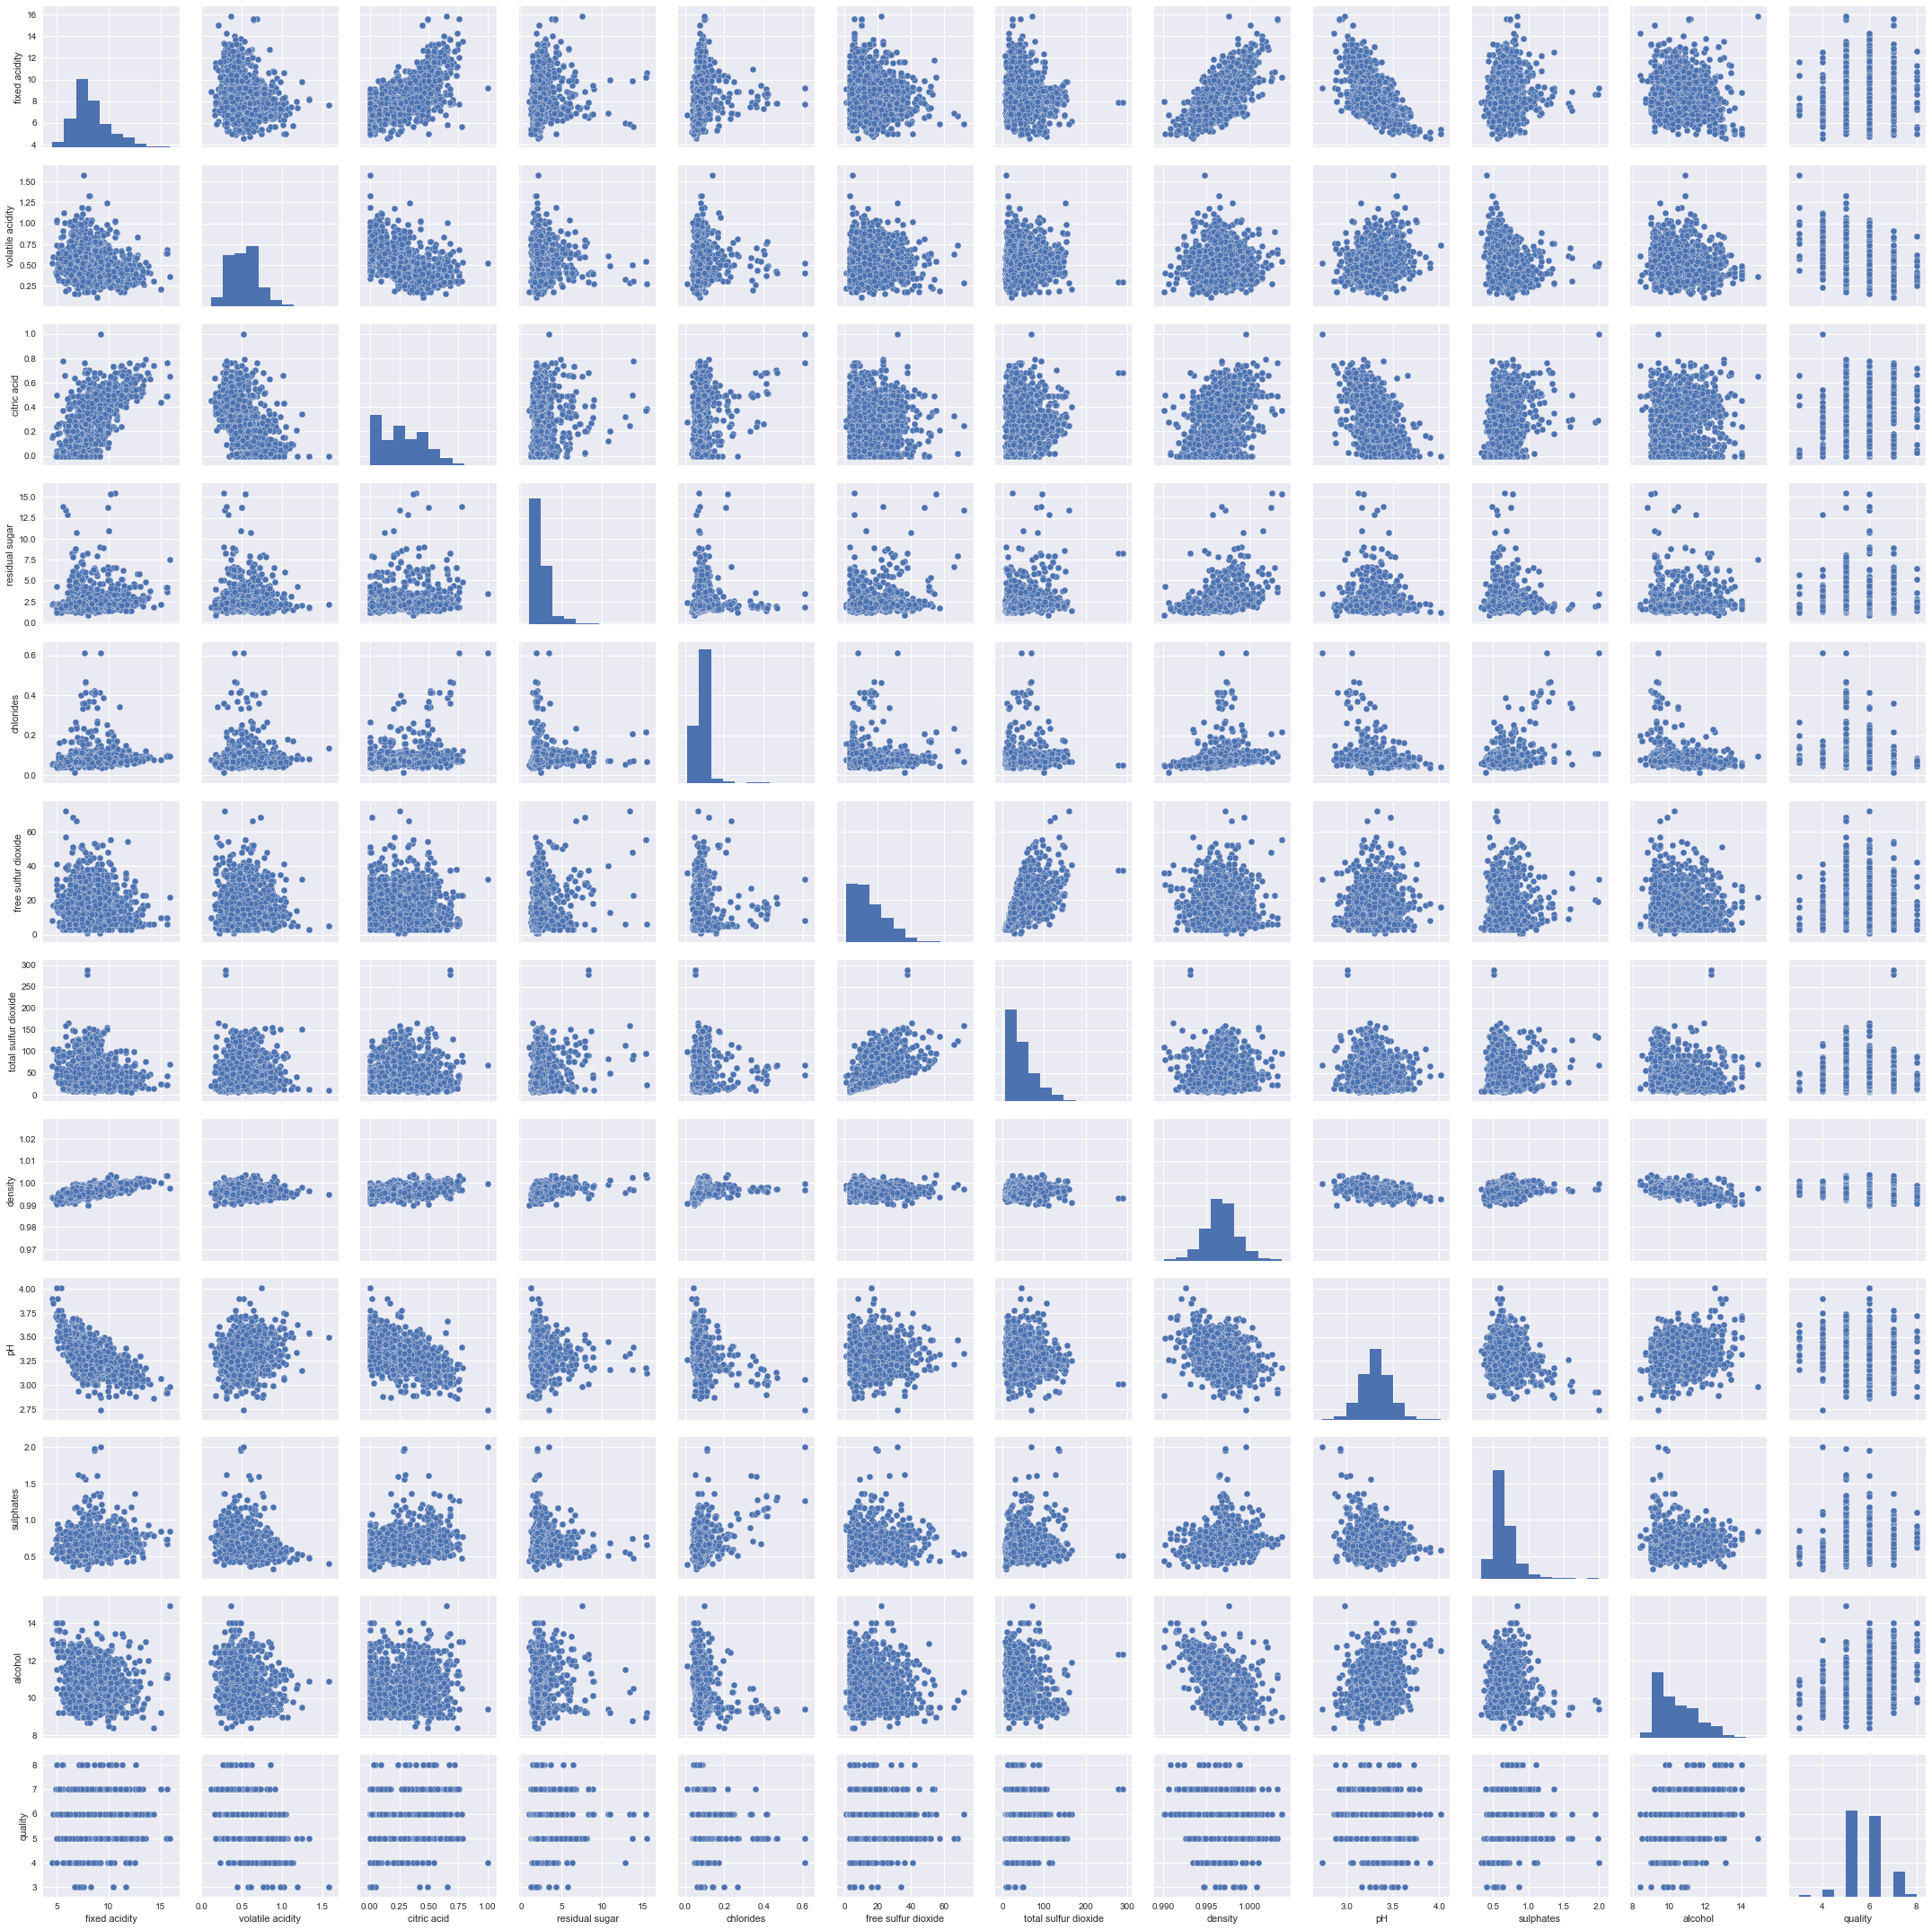

In [76]:
sns.pairplot(wine_red)

<b>Observation:</b>
<li> There are outliers in variables (volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide and density).</li>

<b>Feature Engineering</b>

In [77]:
wine_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


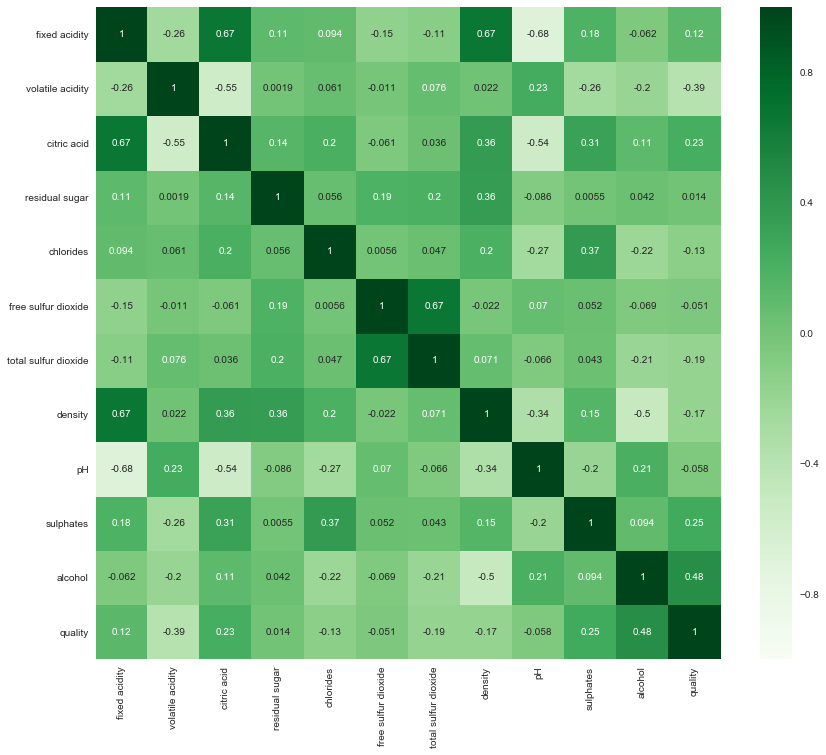

In [79]:
heatmap=wine_red.corr()
plt.figure(figsize=(14,12))
sns.heatmap(heatmap, cmap="Greens",annot=True,linewidths=0, vmin=-1)

<b>Observations:</b>
<li>There is multicollinearity in citric acid and density. To remove this problem, we are removing citric acid from the dataset.</li>
<li>There is correlation between fixed acidity and density.</li>

In [67]:
# Removing one attribute(citric acid) from dataset. As it has multicollinearity.
import warnings
warnings.filterwarnings("ignore")
wine_red.drop(["citric acid"],axis=1,inplace=True)

In [68]:
wine_red.shape

(1599, 11)

# Data Visualization

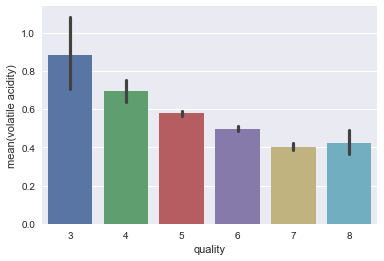

In [96]:
sns.barplot(x="quality",y="volatile acidity", data=wine_red)
plt.show()

<b>Observation:</b>
<li> A higher quality is associated with low volatile acidity levels.</li>

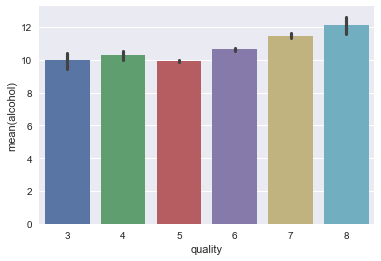

In [97]:
sns.barplot(x="quality",y="alcohol", data=wine_red)
plt.show()

<b>Observation:</b>
<li> From the above visualization, we can see that most people like wine that contain a higher percentage of alcohol.</li>

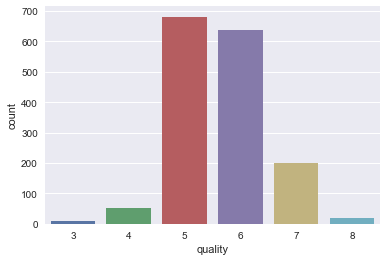

In [98]:
sns.countplot(x="quality", data=wine_red)
plt.show()

<b>Observation:</b>
<li> Here we can see that most wines of quality 5 and 6.</li>
<li> 3 and 8 are very less.</li>

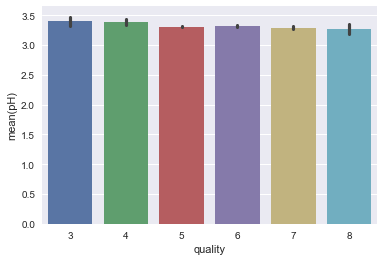

In [99]:
sns.barplot(x="quality",y="pH", data=wine_red)
plt.show()

<b>Observation:</b>
<li> pH is almost same in each type of wine.</li>

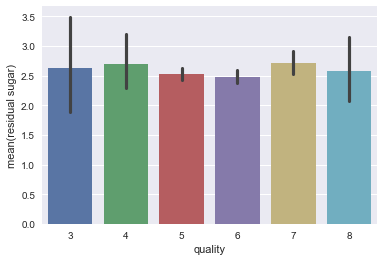

In [100]:
sns.barplot(x="quality",y="residual sugar", data=wine_red)
plt.show()

<b>Observation:</b>
<li> residual sugar is equal in each type of wine.</li>

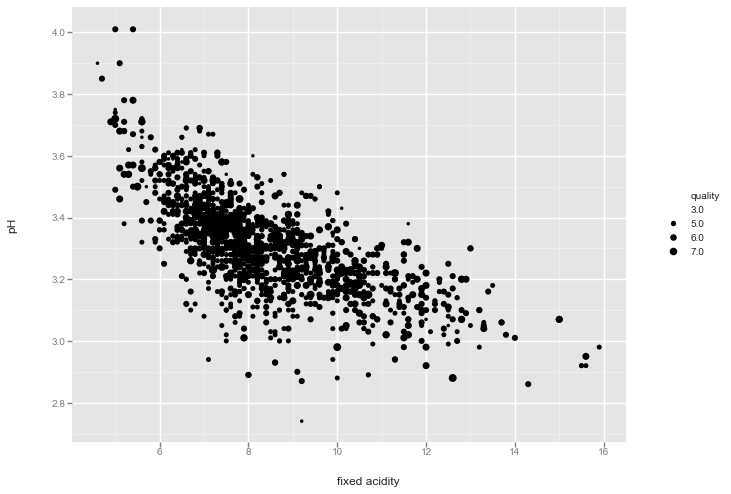

<ggplot: (-9223371868067607075)>

In [101]:
from ggplot import *
import warnings
warnings.filterwarnings("ignore")
ggplot(wine_red, aes(x="fixed acidity",y="pH",size="quality"))+geom_point()

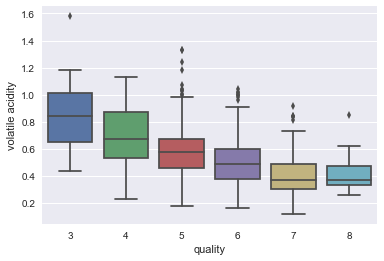

In [154]:
# from the correlation matrix we have seen that volatile acidity has outliers. Lets visualize this.
sns.boxplot(x="quality",y="volatile acidity",data=wine_red)
plt.show()

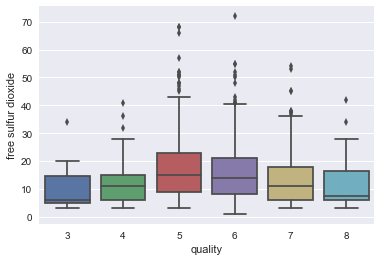

In [152]:
# from the correlation matrix we have seen that free sulfur dioxide has outliers. Lets visualize this.
sns.boxplot(x="quality",y="free sulfur dioxide",data=wine_red)
plt.show()

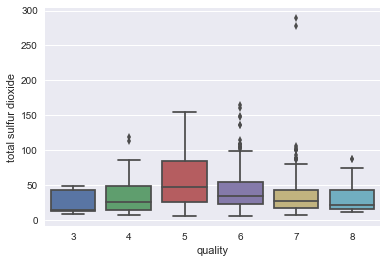

In [151]:
# from the correlation matrix we have seen that total sulfur dioxide has outliers. Lets visualize this.
sns.boxplot(x="quality",y="total sulfur dioxide",data=wine_red)
plt.show()

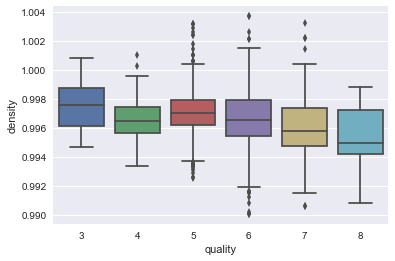

In [153]:
# from the correlation matrix we have seen that density has outliers. Lets visualize this.
sns.boxplot(x="quality",y="density",data=wine_red)
plt.show()

<b>Removing Outliers</b>

In [69]:
from scipy.stats import zscore
z_score=zscore(wine_red)
print("Shape of the dataset before removing outliers",wine_red.shape)
wine_red= wine_red.loc[(abs(z_score)<3).all(axis=1)]
print("Shape of the dataset after removing outliers",wine_red.shape)

Shape of the dataset before removing outliers (1599, 11)
Shape of the dataset after removing outliers (1451, 11)


<b>Checking Skewness</b>

In [70]:
wine_red.skew(axis=0)

fixed acidity           0.823934
volatile acidity        0.380659
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [71]:
#Treating using log
for col in wine_red.columns:
    if wine_red.skew().loc[col]>0.55:
        wine_red[col]=np.log1p(wine_red[col])

In [72]:
wine_red.skew(axis=0)

fixed acidity           0.427066
volatile acidity        0.380659
residual sugar          1.541853
chlorides               2.074343
free sulfur dioxide    -0.167401
total sulfur dioxide   -0.052860
density                 0.055738
pH                      0.114705
sulphates               0.667517
alcohol                 0.606101
quality                 0.407865
dtype: float64

<b>Exploring Target Variable</b>

In [73]:
wine_red["quality"].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [74]:
condition= [(wine_red["quality"]>=6.5),(wine_red["quality"]<=6)]
rating=["good","bad"]
wine_red["quality"]= np.select(condition,rating)

In [75]:
wine_red["quality"].value_counts()

bad     1250
good     201
Name: quality, dtype: int64

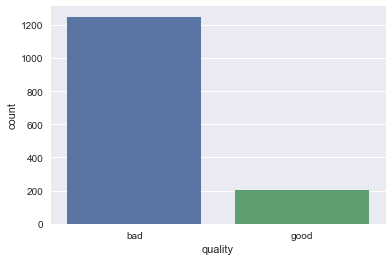

In [78]:
sns.countplot(wine_red["quality"])

<b>Observation:</b>
As per the condition, we have categorize quality as bad and good. From the above visualization, we can see that there are more wine with bad quality.

<b> Splitting the data into independent and dependent variables</b>

In [79]:
X= wine_red.drop(["quality"],axis=1)
y= wine_red["quality"]

<b>Standarization</b>

In [81]:
# Lets bring the dataset features into same scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Label Encoder</b>

In [82]:
# Lets convert the target variable
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
y=LE.fit_transform(y)

<b>Splitting the data into train and test</b>

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30,stratify=y)

In [84]:
# We will use auc_roc score as the metrics because target variable has imbalance dataset
from sklearn.metrics import roc_auc_score
def max_auc_roc_score(w,X,y):
    max_auc_roc_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        w.fit(X_train,y_train)
        y_pred= w.predict(X_test)
        auc_roc=roc_auc_score(y_test,y_pred)
        if auc_roc>max_auc_roc_score:
            max_auc_roc_score=auc_roc
            a_score=r_state
    print("Maximum AUC_ROC Score corresponding to:",a_score," and it is :",round((max_auc_roc_score),3))

<b> Machine Learning Models</b>

As it is classification problem, we will use Logistic Regression, KNN, Decision Tree Classifier, Naive Bayes Classifier, Support Vector Machine Classifier, XG Boost Classifier and Gradient Boosting Classifier.

<b> Logistic regression</b>

In [85]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
max_auc_roc_score(log,X,y)

Maximum AUC_ROC Score corresponding to: 49  and it is : 0.726


In [86]:
predlr= log.predict(X_test)
score_model1= log.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((score_model1),3))
print(confusion_matrix(y_test,predlr))

The accuracy of the Logistic Model is: 0.883
[[359  17]
 [ 34  26]]


<b>Observations:</b>
<li> There are 359 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 26 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 17 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 34 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [87]:
print(classification_report(y_test,predlr))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       376
          1       0.60      0.43      0.50        60

avg / total       0.87      0.88      0.87       436



<b>Observation:</b>
<li>we got precision 0.87 and recall 0.88 that means that we got high recall, low precision.</li>

In [88]:
from sklearn.model_selection import cross_val_score
mf_auc=cross_val_score(log, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(log, X,y,cv=5,scoring="roc_auc").mean())
mfs_auc= cross_val_score(log, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for logistic from mean AUC_ROC score is",cross_val_score(log, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8930668292682927
standard deviation for logistic from mean AUC_ROC score is 0.018848293219475582


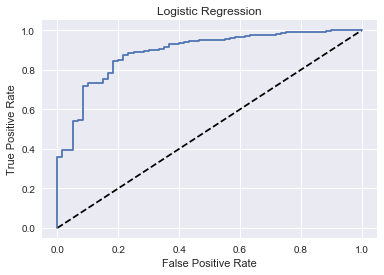

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= log.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

<b>KNN</b>

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn1= GridSearchCV(knn, neighbors, cv=5,scoring="roc_auc")
knn1.fit(X,y)
knn1.best_params_

{'n_neighbors': 28}

In [91]:
knn1=KNeighborsClassifier(n_neighbors=28)
max_auc_roc_score(knn1,X,y)

Maximum AUC_ROC Score corresponding to: 79  and it is : 0.671


In [92]:
predknn= knn1.predict(X_test)
score_model2= knn1.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((score_model2),3))
print(confusion_matrix(y_test,predknn))

The accuracy of the KNN Model is: 0.888
[[370   6]
 [ 43  17]]


<b>Observations:</b>
<li> There are 370 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 17 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 6 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 43 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [93]:
print(classification_report(y_test,predknn))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       376
          1       0.74      0.28      0.41        60

avg / total       0.87      0.89      0.87       436



<b>Observation:</b>
<li>we got precision 0.87 and recall 0.89 that means that we got high recall, low precision.</li>

In [94]:
from sklearn.model_selection import cross_val_score
mf_knn_auc=cross_val_score(knn1, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(knn1, X,y,cv=5,scoring="roc_auc").mean())
mf_sknn_auc= cross_val_score(knn1, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for KNN from mean AUC_ROC score is",cross_val_score(knn1, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8352919512195122
standard deviation for KNN from mean AUC_ROC score is 0.024299059313514875


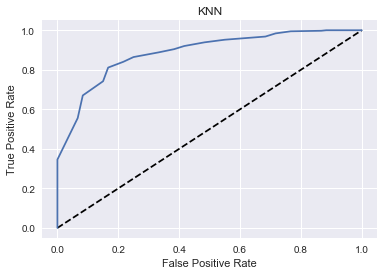

In [95]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= knn1.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

<b>Decision Tree Classifier</b>

In [102]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=30)

max_auc_roc_score(dt,X,y)

Maximum AUC_ROC Score corresponding to: 85  and it is : 0.851


In [103]:
preddt= dt.predict(X_test)
score_model3= dt.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((score_model3),3))
print(confusion_matrix(y_test,preddt))

The accuracy of the Decision Tree Model is: 0.961
[[366  10]
 [  7  53]]


<b>Observations:</b>
<li> There are 366 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 53 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 10 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 7 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [104]:
print(classification_report(y_test,preddt))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       376
          1       0.84      0.88      0.86        60

avg / total       0.96      0.96      0.96       436



<b>Observation:</b>
<li>we got precision and recall equal.</li>

In [105]:
from sklearn.model_selection import cross_val_score
mf_dt_auc=cross_val_score(dt, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score Score after cross validation", cross_val_score(dt, X,y,cv=5,scoring="roc_auc").mean())
mf_sdt_auc= cross_val_score(dt, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Decision Tree Classifier from mean AUC_ROC score is",cross_val_score(dt, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score Score after cross validation 0.6581682926829269
standard deviation for Decision Tree Classifier from mean AUC_ROC score is 0.04267993898950103


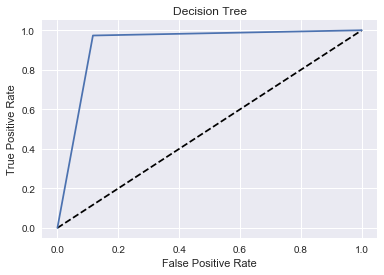

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dt.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

<b>Naive Bayes Classifier</b>

In [107]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
max_auc_roc_score(nb,X,y)

Maximum AUC_ROC Score corresponding to: 49  and it is : 0.839


In [108]:
prednb= nb.predict(X_test)
score_model4= nb.score(X_test, y_test)
print("The accuracy of the Gaussian NB Model is:",round((score_model4),3))
print(confusion_matrix(y_test,prednb))

The accuracy of the Gaussian NB Model is: 0.878
[[343  33]
 [ 20  40]]


<b>Observations:</b>
<li> There are 343 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 40 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 33 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 20 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [109]:
print(classification_report(y_test,prednb))

             precision    recall  f1-score   support

          0       0.94      0.91      0.93       376
          1       0.55      0.67      0.60        60

avg / total       0.89      0.88      0.88       436



<b>Observation:</b>
<li>we got precision 0.89 and recall 0.88 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [110]:
from sklearn.model_selection import cross_val_score
mf_nb_auc=cross_val_score(nb, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(nb, X,y,cv=5,scoring="roc_auc").mean())
mf_snb_auc= cross_val_score(nb, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gaussian NB from mean AUC_ROC score is",cross_val_score(nb, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8820082926829269
standard deviation for Gaussian NB from mean AUC_ROC score is 0.027432613347516836


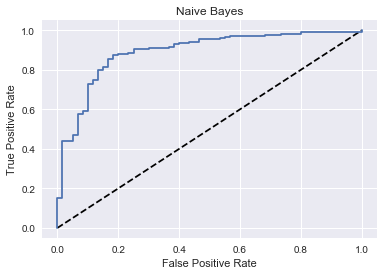

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= nb.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes")
plt.show()

<b>Support vector Machine Classifier</b>

In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1]}
sv1 = GridSearchCV(sv, parameters, cv=5,scoring="roc_auc")
sv1.fit(X,y)
sv1.best_params_

{'C': 1, 'kernel': 'linear'}

In [113]:
sv=SVC(kernel="linear",C=1,probability=True)
max_auc_roc_score(sv,X,y)

Maximum AUC_ROC Score corresponding to: 47  and it is : 0.676


In [114]:
predsv= sv.predict(X_test)
score_model5= sv.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((score_model5),3))
print(confusion_matrix(y_test,predsv))

The accuracy of the SVM Model is: 0.888
[[367   9]
 [ 40  20]]


<b>Observations:</b>
<li> There are 367 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 20 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 9 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 40 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [115]:
print(classification_report(y_test,predsv))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       376
          1       0.69      0.33      0.45        60

avg / total       0.87      0.89      0.87       436



<b>Observation:</b>
<li>we got precision 0.87 and recall 0.89 that means that we got high recall, low precision.</li>

In [116]:
from sklearn.model_selection import cross_val_score
mf_sv_auc=cross_val_score(sv, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(sv, X,y,cv=5,scoring="roc_auc").mean())
mf_ssv_auc= cross_val_score(sv, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for SVM from mean AUC_ROC score is",cross_val_score(sv, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8881209756097561
standard deviation for SVM from mean AUC_ROC score is 0.019267594528876917


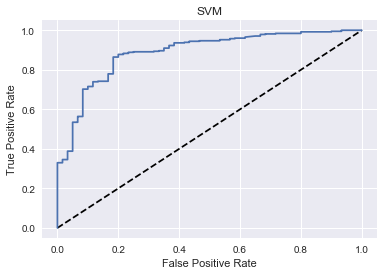

In [117]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= sv.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

<b>XG Boost Classifier</b>

In [118]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
max_auc_roc_score(xg,X,y)

Maximum AUC_ROC Score corresponding to: 46  and it is : 0.79


In [119]:
predxg= xg.predict(X_test)
score_model6= xg.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((score_model6),3))
print(confusion_matrix(y_test,predxg))

The accuracy of the XG Boost Model is: 0.943
[[372   4]
 [ 21  39]]


<b>Observations:</b>
<li> There are 372 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 39 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observation which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 21 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [120]:
print(classification_report(y_test,predxg))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       376
          1       0.91      0.65      0.76        60

avg / total       0.94      0.94      0.94       436



<b>Observation:</b>
<li> We got high recall and low precision. </li>

In [121]:
from sklearn.model_selection import cross_val_score
mf_xg_auc=cross_val_score(xg, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(xg, X,y,cv=5,scoring="roc_auc").mean())
mf_sxg_auc= cross_val_score(xg, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for XG Boost from mean AUC_ROC score is",cross_val_score(xg, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.8760570731707317
standard deviation for XG Boost from mean AUC_ROC score is 0.03680224350427898


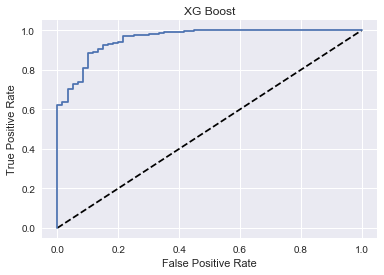

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= xg.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

<b>Gradient Boosting Classifer</b>

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.06, max_depth=10)

max_auc_roc_score(gbcl,X,y)

Maximum AUC_ROC Score corresponding to: 73  and it is : 0.802


In [125]:
predgbcl= gbcl.predict(X_test)
score_model7= gbcl.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((score_model7),3))
print(confusion_matrix(y_test,predgbcl))

The accuracy of the Grading Boosting Model is: 0.97
[[372   4]
 [  9  51]]


<b>Observations:</b>
<li> There are 372 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 51 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 9 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [126]:
print(classification_report(y_test,predgbcl))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       376
          1       0.93      0.85      0.89        60

avg / total       0.97      0.97      0.97       436



<b>Observation:</b>
<li> We got value of precision and recall equal.</li>

In [127]:
from sklearn.model_selection import cross_val_score
mf_gbcl_auc=cross_val_score(gbcl, X,y,cv=5,scoring="roc_auc").mean()
print("Mean AUC_ROC Score after cross validation", cross_val_score(gbcl, X,y,cv=5,scoring="roc_auc").mean())
mf_sgbcl_auc= cross_val_score(gbcl, X,y,cv=5,scoring="roc_auc").std()
print("standard deviation for Gradient  Boosting from mean AUC_ROC score is",cross_val_score(gbcl, X,y,cv=5,scoring="roc_auc").std())

Mean AUC_ROC Score after cross validation 0.7327726829268293
standard deviation for Gradient  Boosting from mean AUC_ROC score is 0.07323561680188252


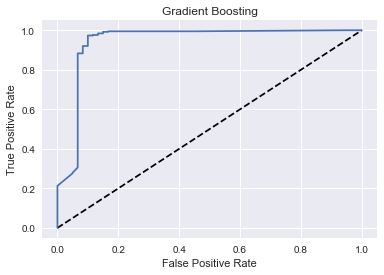

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gbcl.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

# Evaluation:

In [129]:
#Lets initialise the data frame with columns model and f1_score
data1= [["Logistic Regression", score_model1, mf_auc, mfs_auc], ["KNN", score_model2,mf_knn_auc, mf_sknn_auc],["Decision Tree", score_model3, mf_dt_auc, mf_sdt_auc],["Naive Bayes", score_model4,mf_nb_auc,mf_snb_auc],["SVM",score_model5,mf_sv_auc,mf_ssv_auc],["XG Boost", score_model6, mf_xg_auc,mf_sxg_auc],["Gradient Boosting",score_model7,mf_gbcl_auc,mf_sgbcl_auc]]
compare_data= pd.DataFrame(data1, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5,6,7])
compare_data

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.883028,0.893067,0.018848
2,KNN,0.887615,0.835292,0.024299
3,Decision Tree,0.961009,0.669007,0.046136
4,Naive Bayes,0.878440,0.882008,0.027433
5,SVM,0.887615,0.888121,0.019268
6,XG Boost,0.942661,0.876057,0.036802
7,Gradient Boosting,0.970183,0.737395,0.079314


<b>Observations:</b>
<li> From the above models, Gradient Boosting performed well with 97% accuracy.</li>
<li>As the data was imbalanced, we used AUC ROC score for evaluation.</li>

<b>Saving the Prediction</b>

As the Gradient Boosting performed well, we are saving the prediction of this.

In [132]:
np.savetxt('Model5.csv',predgbcl,delimiter=',')

In [130]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(gbcl, 'wine_dataset.pkl')

['wine_dataset.pkl']